In [24]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

In [27]:
dicto = {
'population':[3.48110590e+07,1.98422510e+07,4.03818600e+07,2.97502900e+06,2.13703480e+07,8.33146500e+06,8.86871300e+06,3.48587000e+05,1.48252473e+08,2.77315000e+05,9.52645300e+06,1.07791550e+07,3.06165000e+05,8.97352500e+06,6.94990000e+05,9.59991600e+06,1.96786600e+06,1.94769696e+08,7.51364600e+06,1.47090110e+07,8.82179500e+06,1.39336600e+07,1.95704180e+07,3.33632560e+07,1.11397400e+07,1.66459400e+07,4.49016600e+07,6.65414000e+05,3.83277100e+06,4.42950600e+06,1.92616470e+07,4.34415100e+06,1.12902390e+07,5.49530200e+06,8.09639000e+05,1.44476000e+07,7.89761220e+07,6.00419900e+06,6.86223000e+05,4.50063800e+06,1.33994100e+06,8.43206000e+05,5.31417000e+06,6.23095290e+07,1.47374100e+06,1.58674900e+06,4.34329000e+06,8.06659060e+07,2.31159190e+07,1.11617550e+07,1.41066870e+07,1.04273560e+07,1.56129300e+06,7.48096000e+05,9.70513000e+06,7.25947000e+06,1.00506990e+07,3.10033000e+05,1.19707011e+09,2.35360765e+08,7.25306930e+07,4.48014500e+06,7.09380800e+06,5.93192340e+07,2.71734400e+06,1.27317900e+08,1.59159660e+07,3.82444420e+07,2.14421500e+06,4.10938900e+06,1.97219400e+06,3.67278200e+06,3.21980200e+06,4.85079000e+05,1.99267980e+07,1.39046710e+07,2.71974190e+07,3.21026000e+05,1.42234030e+07,4.06392000e+05,3.41455200e+06,1.23801300e+06,1.14972821e+08,4.11116800e+06,2.62966600e+06,3.13505440e+07,2.29948670e+07,5.10300060e+07,2.63251830e+07,1.65198620e+07,4.28538000e+06,5.59452400e+06,1.50851300e+07,1.51115683e+08,4.77163300e+06,2.65228100e+06,1.63096985e+08,3.49867900e+06,6.54026700e+06,6.04713100e+06,2.86420480e+07,9.02971150e+07,3.85257520e+07,1.05774580e+07,1.38896200e+06,2.07416690e+07,1.43123163e+08,9.75031400e+06,1.22297030e+07,9.10953500e+06,5.52183800e+06,4.84964100e+06,5.39671000e+06,2.03059900e+06,9.13258900e+06,5.03488110e+07,4.58170160e+07,1.99495530e+07,3.44701380e+07,5.06657000e+05,1.15375000e+06,9.22633300e+06,7.64654200e+06,7.25407200e+06,4.28447440e+07,6.64532550e+07,6.05293700e+06,1.31537200e+06,1.04080910e+07,7.03443570e+07,3.10144270e+07,4.60284760e+07,6.16896200e+07,3.04473143e+08,3.35083200e+06,2.69527190e+07,8.65893420e+07,1.31145790e+07,1.34954620e+07], 
'fertility':[2.73,6.43,2.24,1.4,1.96,1.41,1.99,1.89,2.38,1.83,1.42,1.82,2.91,5.27,2.51,3.48,2.86,1.9,1.43,6.04,6.48,3.05,5.17,1.68,6.81,1.89,2.43,5.05,5.1,1.91,4.91,1.43,1.5,1.89,3.76,2.73,2.95,2.32,5.31,5.16,1.62,2.74,1.85,1.97,4.28,5.8,1.79,1.37,4.19,1.46,4.12,5.34,5.25,2.74,3.5,3.27,1.33,2.12,2.64,2.48,1.88,2.,2.92,1.39,2.39,1.34,2.51,4.76,1.5,1.57,3.34,5.19,1.42,1.63,4.79,5.78,2.05,2.38,6.82,1.38,4.94,1.58,2.35,1.49,2.37,2.44,5.54,2.05,2.9,1.77,2.12,2.72,7.59,6.02,1.96,2.89,3.58,2.61,4.07,3.06,2.58,3.26,1.33,1.36,2.2,1.34,1.49,5.06,5.11,1.41,5.13,1.28,1.31,1.43,7.06,2.54,1.42,2.32,4.79,2.41,3.7,1.92,1.47,3.7,5.54,1.48,4.88,1.8,2.04,2.15,6.34,1.38,1.87,2.07,2.11,2.46,1.86,5.88,3.85], 
'HIV':[0.1,2.,0.5,0.1,0.1,0.3,0.1,3.1,0.06,1.3,0.2,0.2,2.4,1.2,0.2,0.2,24.9,0.45,0.1,1.2,3.5,0.6,5.3,0.2,3.4,0.4,0.5,0.06,3.5,0.3,3.7,0.06,0.1,0.2,2.6,0.4,0.06,0.8,4.7,0.8,1.2,0.1,0.1,0.4,5.3,1.7,0.1,0.1,1.8,0.1,0.8,1.4,2.5,1.2,2.,0.8,0.06,0.3,0.32,0.2,0.2,0.2,0.2,0.3,1.7,0.06,0.1,6.3,0.6,0.1,23.6,1.6,0.1,0.3,0.2,11.2,0.5,0.06,1.,0.1,0.7,0.9,0.3,0.4,0.06,0.1,11.4,0.6,0.4,0.2,0.1,0.2,0.8,3.6,0.1,0.1,0.1,0.9,0.9,0.3,0.4,0.06,0.1,0.5,0.06,0.1,1.,2.9,0.8,0.1,1.6,0.1,0.06,0.06,0.6,17.9,0.4,0.06,1.,1.,25.9,0.1,0.4,0.2,5.8,1.3,3.2,1.5,0.06,0.06,6.4,1.1,0.2,0.6,0.5,0.1,0.4,13.6,15.1], 
'CO2' : [3.32894466e+00, 1.47435339e+00, 4.78516998e+00, 1.80410622e+00, 1.80163133e+01, 8.18316002e+00, 5.10953829e+00, 3.13192132e+00, 3.19161002e-01, 6.00827884e+00, 6.48817388e+00, 9.79733671e+00, 1.36012592e+00, 5.37539184e-01, 6.01210310e-01, 1.43182915e+00, 2.54720549e+00, 2.02377284e+00, 6.69013908e+00, 1.09419171e-01, 3.13888013e-02, 2.87547496e-01, 2.95541639e-01, 1.63503986e+01, 4.78391264e-02, 4.24025914e+00, 1.47609182e+00, 1.78853064e-01, 3.84220477e-01, 1.91193342e+00, 3.61896603e-01, 5.28790258e+00, 2.70177717e+00, 8.54150780e+00, 6.12799524e-01, 2.11051780e+00, 2.51239420e+00, 1.06776463e+00, 6.79825323e+00, 8.37456442e-02, 1.30313789e+01, 1.27777956e+00, 1.06441143e+01, 5.99902073e+00, 1.07953932e+00, 2.51002328e-01, 1.41942978e+00, 9.49724676e+00, 3.66600849e-01, 8.66123553e+00, 8.35594820e-01, 1.26964400e-01, 1.56376432e-01, 2.07341531e+00, 2.49306755e-01, 1.18745352e+00, 5.45323172e+00, 6.82190305e+00, 1.52084942e+00, 1.75504422e+00, 7.89221094e+00, 9.88253103e+00, 1.00011881e+01, 7.46594241e+00, 4.39145647e+00, 9.53660569e+00, 1.47181043e+01, 2.66308378e-01, 3.34184866e+00, 3.99672180e+00, 8.61766942e-03, 1.57352183e-01, 4.49848339e+00, 2.21680797e+01, 9.94221476e-02, 8.24698808e-02, 7.75223395e+00, 3.27772577e+00, 4.10788666e-02, 6.18277102e+00, 6.13103977e-01, 3.07876290e+00, 4.26117187e+00, 1.31332119e+00, 3.75948682e+00, 1.59408314e+00, 1.04748301e-01, 1.91053400e-01, 1.05412983e-01, 1.05330281e+01, 8.00908440e+00, 7.78151613e-01, 6.34371088e-02, 6.14689662e-01, 1.05297688e+01, 1.55720805e+01, 9.35618056e-01, 2.22379634e+00, 5.30746337e-01, 6.98581746e-01, 1.45013444e+00, 8.42120697e-01, 8.27076715e+00, 5.48692640e+00, 4.87020615e+01, 4.38344907e+00, 1.19827176e+01, 5.42444698e-02, 4.61633711e-01, 5.27122268e+00, 1.18255775e-01, 4.11444075e+00, 6.90165446e+00, 8.51182820e+00, 6.82188892e-02, 9.42796037e+00, 7.29308876e+00, 5.80791088e-01, 3.82117945e-01, 4.74113997e+00, 9.49860795e-01, 5.31568840e+00, 5.33305762e+00, 4.53167660e-01, 1.54672995e-01, 3.83510189e+00, 2.51983337e-01, 3.19577173e+01, 2.44066948e+00, 4.02190259e+00, 1.00852839e-01, 7.03235908e+00, 8.52646682e+00, 1.85459917e+01, 2.48976355e+00, 4.47666902e+00, 1.47934658e+00, 1.48981514e-01, 6.54323190e-01], 
'BMI_male' : [ 24.5962, 22.25083,27.5017, 25.35542,27.56373,26.46741,25.65117,27.24594,20.39742,26.38439,26.16443,26.75915,27.02255,22.41835,22.8218, 24.43335,22.12984,25.78623,26.54286,21.27157,21.50291,20.80496,23.68173,27.4521, 21.48569,27.01542,24.94041,22.06131,21.87134,26.47897,22.56469,26.59629,25.06867,26.13287,23.38403,25.58841,26.73243,26.36751,23.7664, 20.88509,26.26446,26.53078,26.73339,25.85329,24.0762, 21.65029,25.54942,27.16509,22.84247,26.33786,25.29947,22.52449,21.64338,23.68465,23.66302,25.10872,27.11568,27.20687,20.95956,21.85576,25.31003,27.65325,27.13151,26.4802, 24.00421,23.50004,26.29078,21.59258,26.45693,27.20117,21.90157,21.89537,26.86102,27.43404,21.40347,22.03468,24.73069,23.21991,21.78881,27.68361,22.62295,25.15669,27.42468,24.2369,24.88385,25.63182,21.93536,21.44932,20.76344,26.01541,27.76893,25.77291,21.21958,23.03322,26.93424,26.24109,22.29914,26.26959,25.01506,25.54223,24.77041,22.87263,26.6738, 26.68445,28.13138,25.41069,26.01131,22.55453,21.92743,26.51495,22.53139,23.83996,26.92717,27.43983,21.96917,26.85538,27.49975,21.96671,22.40484,25.49887,23.16969,26.37629,26.20195,23.77966,22.47792,23.00803,21.87875,26.39669,25.15699,26.70371,22.35833,25.42379,27.39249,28.45698,26.39123,25.32054,20.9163, 20.68321,22.0266 ], 
'GDP' : [12314.,7103., 14646.,7383., 41312., 43952., 14365., 24373.,2265., 16075., 14488., 41641.,8293.,1646.,5663.,5066., 13858., 13906., 15368.,1358., 723.,2442.,2571., 41468.,1753., 18698., 10489.,1440.,5022., 12219.,2854., 21873., 17765., 45017.,2502.,9244.,9974.,7450., 40143.,1088., 24743.,7129., 42122., 37505., 15800.,1566.,5900., 41199.,2907., 32197.,6960.,1230.,1326.,5208.,1600.,4391., 23334., 42294.,3901.,7856., 15955., 47713., 28562., 37475.,8951., 34800., 18797.,2358., 20977., 14158.,2041., 588., 23223., 95001.,1528., 674., 19968., 12029.,1602., 27872.,3356., 14615., 15826.,3890.,7563.,6091., 864.,2891.,1866., 47388., 32122.,4060., 843.,4684., 65216., 47799.,4187., 14033.,1982.,6684.,9249.,5332., 19996., 27747.,126076., 18032., 22506.,1173.,2162., 12522.,1289., 65991., 24670., 30816., 615., 12263., 34676.,6907.,3246., 13470.,5887., 43421., 55020.,2001.,2030., 12216.,1219., 30875.,9938., 16454.,1437.,8762., 37739., 50384., 15317.,3733.,4085.,3039.,1286.], 
'BMI_female' : [ 129.9049,130.1247,118.8915,132.8108,117.3755,124.1394,128.6024,124.3862,125.0307,126.394, 129.7968,121.8227,120.9224,130.2723,125.1258,122.4155,133.1307,124.8745,128.4721,130.6651,134.1955,117.5528,127.2823,118.0571,127.864, 125.5417,124.0235,132.1354,131.6935,121.35,131.5237,130.3921,126.0594,119.5815,129.3376,122.9864,125.0931,119.9321,132.0392,125.7948,129.5161,127.4768,126.5645,120.0146,130.3625,130.208, 130.5789,124.9044,128.2953,122.9342,120.9596,132.2765,130.7627,125.1512,125.3461,122.9621,128.6968,118.7381,123.1274,126.4216,125.1859,124.7801,121.0838,123.703, 125.3685,121.9651,128.8517,129.9341,129.5746,127.5037,131.1361,131.2555,130.8226,122.3705,132.8371,133.939, 123.8593,123.3223,128.0308,124.1571,129.9875,130.8786,122.1216,129.9424,129.7504,126.5284,135.3949,123.1421,125.5561,121.695, 118.7421,123.4792,135.1021,135.492, 126.0266,126.887, 126.5196,122.6829,120.0524,123.615, 119.6368,122.3459,129.6765,127.2631,126.3153,128.7553,128.4903,135.1005,130.2795,130.3755,134.716, 121.1736,129.528, 129.9231,131.5318,130.9949,122.0453,124.8615,129.7199,124.6358,131.8793,122.9473,119.6465,129.9657,130.8328,120.4969,131.0248,124.9939,128.6291,124.0675,134.5204,131.4962,124.0845,118.4777,124.2604,124.3462,121.9367,132.4493,131.9745], 
'life' : [ 75.3,58.3,75.5,72.5,81.5,80.4,70.6,72.2,68.4,75.3,70.1,79.4,70.7,63.2,67.6,70.9,61.2,73.9,73.2,59.4,57.4,66.2,56.6,80.7,54.8,78.9,75.1,62.6,58.6,79.7,55.9,76.5,77.8,78.7,61., 74.,70.1,74.1,56.7,60.4,74., 65.7,79.4,81., 57.5,62.2,72.1,80.,62.7,79.5,70.8,58.3,51.3,63., 61.7,70.9,73.8,82., 64.4,69.5,76.9,79.4,80.9,81.4,75.5,82.6,66.1,61.5,72.3,77.6,45.2,61.,72., 80.7,63.4,51.4,74.5,78.2,55.8,81.4,63.6,72.1,75.7,69.6,63.2,73.3,55., 60.8,68.6,80.3,80.2,75.2,59.7,58., 80.7,74.6,64.1,77.1,58.2,73.6,76.8,69.4,75.3,79.2,80.4,73.4,67.6,62.2,64.3,76.4,55.9,80.9,74.8,78.5,56.7,55., 81.1,74.3,67.4,69.1,46.1,81.1,81.9,69.5,59.7,74.1,60., 71.3,76.5,75.1,57.2,68.2,79.5,78.2,76., 68.7,75.4,52., 49. ], 
'child_mortality' : [29.5,192.,15.4, 20., 5.2,4.6, 43.3, 14.5, 55.9, 15.4,7.2,4.7, 20.1,116.3, 48.1, 52.,63.8, 18.6, 13.7,130.4,108.6, 51.5,113.8,5.8,168., 8.9, 19.7, 91.2, 72.6, 10.3,116.9,5.9,6.3,4.3, 81.,26.8, 31.4, 21.6,118.4, 60.4,5.5, 24., 3.3,4.3, 68.,87.4, 19.3,4.4, 79.9,4.9, 36.9,121., 127.6, 41.9, 83.3, 26.5,7.2,2.7, 65.6, 36.2, 21.4,4.5,4.9,4.1, 18.9,3.4, 25.9, 71.,10.5, 11.3,114.2,100.9,8.2,2.8, 66.7,101.1,8.,16., 148.3,6.6,103.,15.8, 17.9, 17.6, 34.8, 35.8,114.4, 87.2, 50.7,4.8,6.4, 28.1,141.3,140.9,3.6, 11.9, 95.5, 21.,69.7, 25.7, 23.2, 33.4,6.7,4.1,9.5, 16.1, 13.5, 78.3, 75.8,8.,179.1,2.8,8.8,3.7,168.5, 66.1,5.,11.7, 84.7, 26.4,112.2,3.2,4.7, 56.2, 72.4, 15.6, 96.4, 24.9, 19.4, 22.2, 89.3, 12.9,5.6,7.7, 13.,49.2, 26.2, 94.9, 98.3]
}

df = pd.DataFrame(dicto)
df = df[['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP','BMI_female', 'life', 'child_mortality']]


df_columns = df.drop('life', axis=1).columns

y = df['life'].values
X = df.drop('life', axis=1).values

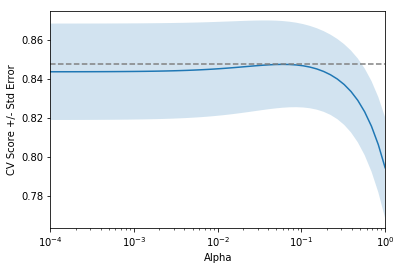

In [30]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X,y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

[-0.         -0.         -0.          0.          0.          0.         -0.
 -0.07087587]


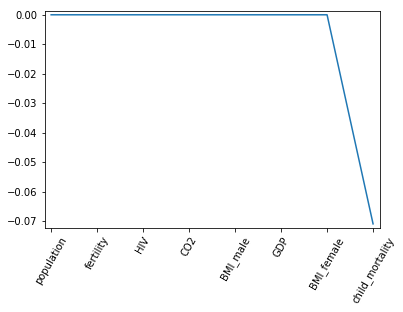

In [28]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()